# Handwritten Digits Recognition Using Neural Networks


### Dataset:
    In this work was developed using the MNIST database (Modified National Institute of Standards and Technology database) containing 60000 samples for training and 10000 for validation of handwritten digits and is commonly used for various image processing systems.
    OBS: This dataset is provided in gzip file format (a byte stream that represents the objects)
    
### Machine Learning Models:
    For this work an ANN was developed from scratch using only numpy as a non-standard python module. This ANN was implemented using stochastic gradient descent to minimize the cost function and a backpropagation algorithm to speed up the calculations during training between epochs.
    At the end of this work a comparison between the model training results and the results from a SVM model will be made. The SVM model used is from scikit-learn module.

In [1]:
import load_data

### Loading and Data Visualization
    The training data is returned as a list o tuples with two entries. The first contains the actual image with an 1D array that represents the 784 pixels from each sample and the second entry is the actual digit (0 to 9) or the expected output from the ANN. 

In [5]:
train_set, valid_set, test_set = load_data.mnist_loader()
print('No of images in train_set: %i ' % len(train_set[0]) )
print('Each image is an array of %i entries ' % len(train_set[0][0]))
train_x, train_y = train_set

No of images in train_set: 50000 
Each image is an array of 784 entries 


### Displaying the Samples 

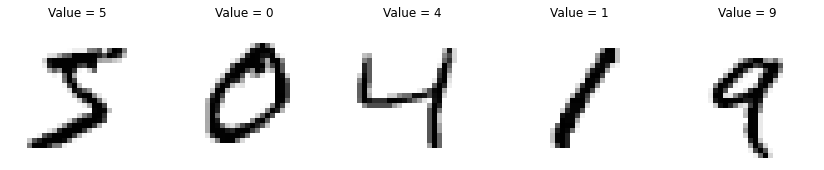

In [6]:
import matplotlib.cm as cm
import matplotlib.pyplot as plt
for i in range(0,5):
    plt.subplot(1,5,i+1)
    plt.imshow(train_x[i].reshape((28,28)), cmap =cm.gray_r)
    plt.axis('off')
    plt.subplots_adjust(right=2)
    plt.title('Value = %i' % train_y[i])
plt.show()

### Training the Neural Network using Backpropagation

In [2]:
import ann
import numpy as np

#Initializing the Ann 784 neurons in the input layer, one hidden layer with 30 neurons, 10 output neurons
net = ann.Network([784, 30, 10])
#using stochastic gradient descent to learn from the MNIST Training Data
# 30 epochs
# mini-batch size = 10
# learning rate = 3.0
training_data, validation_data, test_data = load_data.mnist_loader('ann')
results = net.SGD(training_data, 30, 10, 3.0, test_data=test_data)
results[-1]

'Epoch 0: 9070 / 10000'

### ANN Predictions

10000
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>
<class 'tuple'>


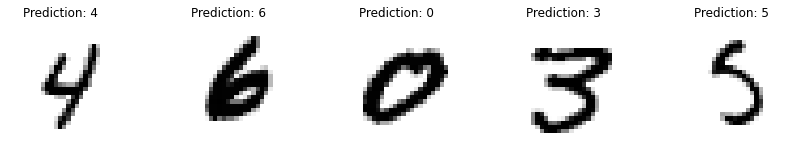

In [7]:
import random

# 5 predictions
for i in range(0,5):
    index = random.randint(0, len(test_data))
    plt.subplot(10, 5, i + 1)
    plt.imshow(test_data[index][0].reshape((28, 28)), cmap=cm.gray_r)
    res = net.predict(test_data[index])
    plt.axis('off')
    plt.subplots_adjust(top = 5, right = 2)
    plt.title('Prediction: %i   ' % res[1])
plt.show()

It's important to remark that the neural network's output is assumed to be the index of whichever neuron in the final layer has the highest activation. In pratical terms, the output of the feedfoward method will be an array of 10 positions and the index of the biggest element represents the predicted digit

### Compairing the ANN result with a SVM model

To train the SVC model will be used just a small portion of the original training dataset

In [12]:
from sklearn import svm
from sklearn.metrics import classification_report
test_x, test_y = test_set
no_images = len(train_x)
reduced_training_set_x = train_x[0: no_images // 10] # 784 array with image pixels
reduced_training_set_y = train_y[0: no_images // 10] # Image real digits
model = svm.SVC(kernel='sigmoid')
model_fit = model.fit(reduced_training_set_x, reduced_training_set_y)
predictions = model_fit.predict(test_x)
# Print Overal metrics from the model
print("Classification report for SVM classifier: \n %s\n\n%s\n"
      % (model, classification_report(test_y, predictions)))

Classification report for SVM classifier: 
 SVC(kernel='sigmoid')

              precision    recall  f1-score   support

           0       0.84      0.89      0.86       980
           1       0.93      0.97      0.95      1135
           2       0.84      0.81      0.82      1032
           3       0.84      0.79      0.81      1010
           4       0.84      0.91      0.88       982
           5       0.67      0.74      0.71       892
           6       0.93      0.87      0.90       958
           7       0.89      0.88      0.89      1028
           8       0.82      0.74      0.78       974
           9       0.84      0.81      0.83      1009

    accuracy                           0.85     10000
   macro avg       0.84      0.84      0.84     10000
weighted avg       0.85      0.85      0.85     10000




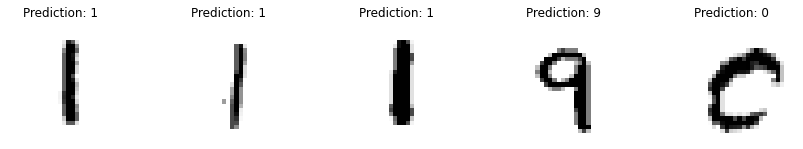

In [13]:
for i in range(0, 5):
    random_index = random.randint(0, len(test_x) - 1)
    plt.subplot(10, 5, i + 1)
    plt.imshow(test_x[random_index].reshape((28, 28)), cmap=cm.gray_r)
    plt.axis('off')
    plt.subplots_adjust(top = 5, right = 2)
    plt.title('Prediction: %i   ' % predictions[random_index])
plt.show()

### Conclusion

The ANN showed a good performance in terms of accuracy compairing to the SVM model, even taking a long time to train the model it was possible to conclude that a simple ANN can have a significative performance without spend much time with parametrization. The performance and accuracy of both models depends heavily on the hyper parameters used and the training data size, so the SVM could have a result better even compairing with the ANN model if well parameterized and anyhow has the advantage of being way faster.
For futher work, the main focus will be realted on develop better methods of learning for the ANN model and decrease the training time.
